In [423]:
import pandas as pd 
dt = pd.read_csv("covid19_confirmed.csv")
dt2 = pd.read_csv("Global_Mobility_Report.csv")

In [424]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Covid19_confirmed data preprocessing

In [3]:
usc = dt[dt['Country/Region'] == 'US']
usc = pd.melt(usc, id_vars='Country/Region', value_vars=usc.iloc[:,4:],
        var_name='date', value_name='confirmed_cases')
usc['date'] = pd.to_datetime(usc.date)
usc = usc.rename(columns={'Country/Region':'Country'})
usc.tail(3)

,Country,date,confirmed_cases
135,US,2020-06-05,1897380
136,US,2020-06-06,1920061
137,US,2020-06-07,1942363


In [15]:
len(usc)

138

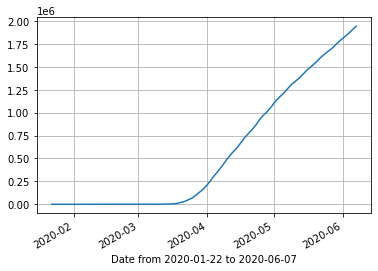

In [96]:
def pltfunc(x,y,data,xlabel=None):
    fig, ax = plt.subplots()
    _=ax.plot(x,y,data =data)
    import matplotlib.dates as mdates
    months = mdates.MonthLocator()
    ax.xaxis.set_major_locator(months)
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()
    _=plt.xlabel(xlabel)
    
pltfunc('date', 'confirmed_cases', usc,"Date from 2020-01-22 to 2020-06-07")

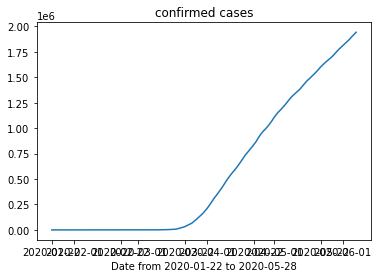

In [25]:
# _ = plt.plot(usc1.index,usc1['confirmed_cases'])
# _ = plt.title('confirmed cases')
# #_= plt.xticks(usc['month'])
# _ = plt.xlabel("Date from 2020-01-22 to 2020-05-28")
# #_ = plt.xticks(rotation='vertical')

In [36]:
usc['month'] = pd.DatetimeIndex(usc['date']).month
usc2 = round(usc.groupby(['Country','month']).mean(),2)
usc2 = usc2.reset_index()
usc2

,Country,month,confirmed_cases
0,US,1,3.80
1,US,2,21.45
2,US,3,35097.42
3,US,4,650783.47
4,US,5,1458511.87
5,US,6,1875260.71


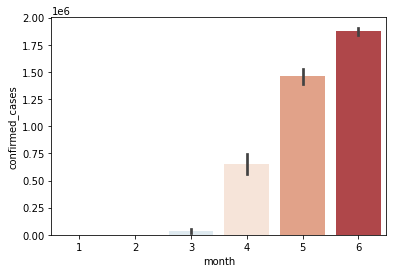

In [37]:
_=sns.barplot(x=usc['month'], y=usc['confirmed_cases'] , palette="RdBu_r")

# US-counties Covid-19 Confirmed

In [553]:
df1 = pd.read_csv('us-counties.csv')
df1.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [465]:
df1.tail()

,date,county,state,fips,cases,deaths
212601,2020-06-06,Sweetwater,Wyoming,56037.0,32,0
212602,2020-06-06,Teton,Wyoming,56039.0,100,1
212603,2020-06-06,Uinta,Wyoming,56041.0,19,0
212604,2020-06-06,Washakie,Wyoming,56043.0,38,3
212605,2020-06-06,Weston,Wyoming,56045.0,1,0


In [466]:
df1.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

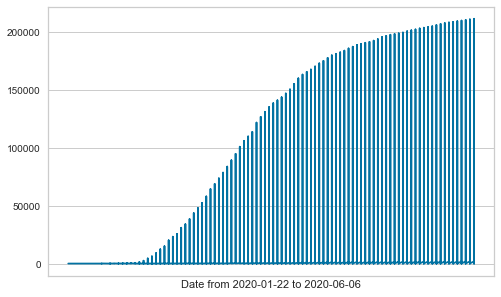

In [467]:
slst = ['New York', 'New Jersey','California','Illinois','Massachusetts']
ny = df1[df1.state=='New York']
pltfunc('date', 'cases', ny,"Date from 2020-01-22 to 2020-06-06")

In [554]:
k = ny.groupby(['state','date']).cases.sum()
k = k.reset_index()
k

,state,date,cases
0,New York,2020-03-01,1
1,New York,2020-03-02,1
2,New York,2020-03-03,2
3,New York,2020-03-04,11
4,New York,2020-03-05,22
...,...,...,...
93,New York,2020-06-02,377881
94,New York,2020-06-03,378924
95,New York,2020-06-04,379977
96,New York,2020-06-05,381019


In [469]:
k['date'] = pd.to_datetime(k.date)

In [470]:
dt = k.cases
lst = []
for i in range(97,0,-1):
    lst.append(dt[i]-dt[i-1])
lst.append(1)
k['daily_cases'] = lst[::-1]
k.describe()

,cases,daily_cases
count,98.000000,98.000000
mean,203295.591837,3899.000000
std,147854.562726,3455.947227
min,1.000000,0.000000
25%,34602.250000,1111.000000
50%,243641.500000,2730.500000
75%,345297.250000,6255.250000
max,382102.000000,12237.000000


In [551]:
k.head()

,state,date,cases,daily_cases
0,New York,2020-03-01,1,1
1,New York,2020-03-02,1,0
2,New York,2020-03-03,2,1
3,New York,2020-03-04,11,9
4,New York,2020-03-05,22,11


In [225]:
import matplotlib.dates as mdates
months = mdates.MonthLocator()
def pltfunc2(x,y,data,xlabel=None,title=None):
    fig, ax = plt.subplots()
    _=ax.plot(x,y,data =data)
    ax.xaxis.set_major_locator(months)
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
    ax.grid(True)

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()
    _=plt.xlabel(xlabel)
    _=plt.title(title)
    
# pltfunc2('date', 'confirmed_cases', usc,"Date from 2020-01-22 to 2020-06-07")

In [445]:
def daily_cases_func(statelist):
    k = statelist.groupby(['state','date']).cases.sum()
    k = k.reset_index()
    k['date'] = pd.to_datetime(k.date)
    dt = k.cases
    lst = []
    for i in range(len(k)-1,0,-1):
        lst.append(dt[i]-dt[i-1])
    lst.append(1)
    k['daily_cases'] = lst[::-1]
    return k
daily_cases_func(k)

,state,date,cases,daily_cases
0,Massachusetts,2020-02-01,1,1
1,Massachusetts,2020-02-02,1,0
2,Massachusetts,2020-02-03,1,0
3,Massachusetts,2020-02-04,1,0
4,Massachusetts,2020-02-05,1,0
...,...,...,...,...
122,Massachusetts,2020-06-02,101163,358
123,Massachusetts,2020-06-03,101592,429
124,Massachusetts,2020-06-04,102063,471
125,Massachusetts,2020-06-05,102557,494


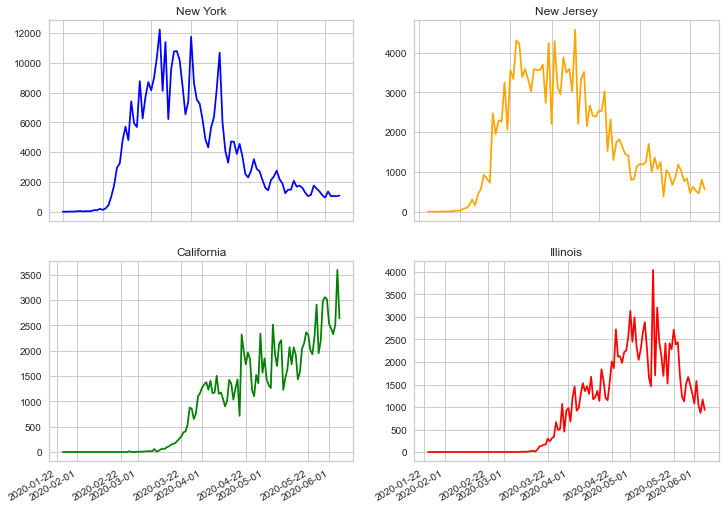

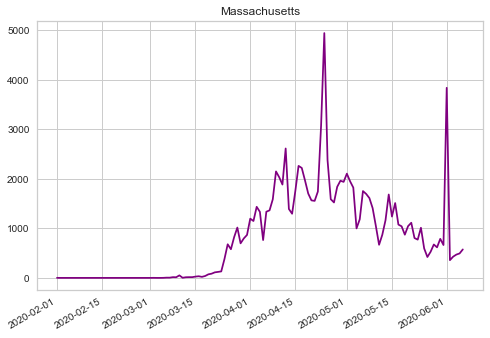

In [472]:
import matplotlib.dates as mdates
months = mdates.MonthLocator()
fig, ax = plt.subplots(2,2,figsize=(12,9))
color = ['blue','orange','green','red','purple']
for j in range(0,5):
    statelist = df1[df1.state==slst[j]]
    k = daily_cases_func(statelist)
    if j == 0:
        t = 'ax[0,0]'
    elif j ==1:
        t = 'ax[0,1]'
    elif j == 2:
        t = 'ax[1,0]'
    elif j == 3:
        t = 'ax[1,1]'
    else:
        fig, ax = plt.subplots()
        t = 'ax'
    p = eval(t)
    p.plot('date', 'daily_cases',data =k,color=color[j])
    p.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    #p.format_ydata = lambda x: '$%1.2f' % x  # format the price.
    p.grid(True)
    fig.autofmt_xdate()
    p.set_title(slst[j])
    

#pltfunc2('date', 'daily_cases', k,title = j)

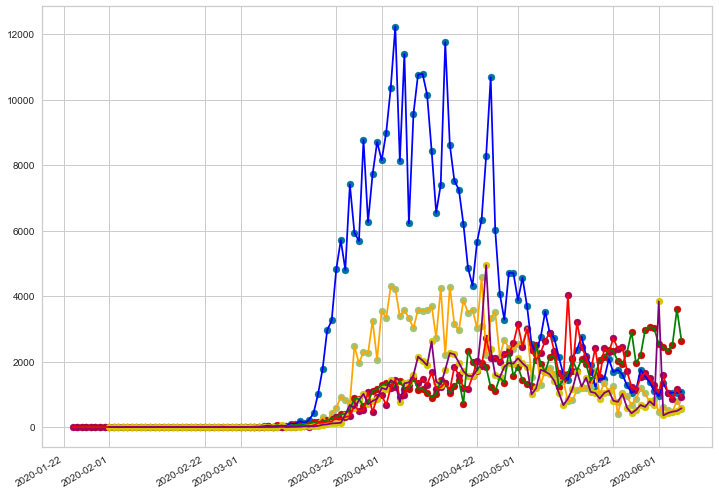

In [454]:
fig, ax = plt.subplots(figsize=(12, 9))
for j in range(len(slst)):
    statelist = df1[df1.state==slst[j]]
    k = daily_cases_func(statelist)
    _=ax.scatter('date', 'daily_cases',data =k)
    _=ax.plot('date', 'daily_cases',data =k, color = color[j])
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)
fig.autofmt_xdate()

In [555]:
k = daily_cases_func( df1[df1.state==slst[0]])
for j in range(1,5):
    statelist = df1[df1.state==slst[j]]
    k = k.append(daily_cases_func(statelist))
fivestatesconfirm =k
fivestatesconfirm.describe()

,cases,daily_cases
count,589.000000,589.000000
mean,68572.227504,1537.393888
std,96105.057495,2017.800429
min,1.000000,0.000000
25%,81.000000,15.000000
50%,28142.000000,1100.000000
75%,97017.000000,2078.000000
max,382102.000000,12237.000000


In [526]:
fivestatesconfirm.state.unique()

array(['New York', 'New Jersey', 'California', 'Illinois',
       'Massachusetts'], dtype=object)

## Global_Mobility_Report data preprocessing

In [475]:
dt2.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0


In [476]:
usm = dt2[dt2['country_region']=='United States']
usm.head(3)

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
184064,US,United States,NaN,NaN,2020-02-15,6.0,2.0,15.0,3.0,2.0,-1.0
184065,US,United States,NaN,NaN,2020-02-16,7.0,1.0,16.0,2.0,0.0,-1.0
184066,US,United States,NaN,NaN,2020-02-17,6.0,0.0,28.0,-9.0,-24.0,5.0


In [477]:
usm.sub_region_1.unique()

array([nan, 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [478]:
ca = usm[usm.sub_region_1=='California']
ca.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
206793,US,United States,California,Yuba County,2020-05-25,21.0,20.0,NaN,-26.0,-66.0,15.0
206794,US,United States,California,Yuba County,2020-05-26,23.0,11.0,NaN,-9.0,-30.0,9.0
206795,US,United States,California,Yuba County,2020-05-27,21.0,14.0,NaN,-15.0,-31.0,9.0
206796,US,United States,California,Yuba County,2020-05-28,20.0,17.0,NaN,-12.0,-31.0,9.0
206797,US,United States,California,Yuba County,2020-05-29,20.0,17.0,94.0,-10.0,-27.0,10.0


In [479]:
usm = usm.rename(columns={'sub_region_1':'state'})

In [480]:
usm = round(usm.groupby(['state','date']).mean(),2)
usm = usm.reset_index()
#usm = usm.rename(columns={'country_region_code':'Country'})
usm.head()

,state,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Alabama,2020-02-15,5.16,0.23,49.57,5.76,0.78,-0.86
1,Alabama,2020-02-16,-1.45,-4.02,-5.48,2.14,-1.92,0.52
2,Alabama,2020-02-17,-1.17,-4.48,12.93,5.73,-16.26,4.33
3,Alabama,2020-02-18,-4.28,-5.00,-12.47,-0.68,0.34,1.44
4,Alabama,2020-02-19,1.44,-0.73,6.67,3.71,1.40,0.00


In [481]:
usm['date']=pd.to_datetime(usm.date)
usm.head(3)

,state,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Alabama,2020-02-15,5.16,0.23,49.57,5.76,0.78,-0.86
1,Alabama,2020-02-16,-1.45,-4.02,-5.48,2.14,-1.92,0.52
2,Alabama,2020-02-17,-1.17,-4.48,12.93,5.73,-16.26,4.33


In [532]:
slst = ['New York', 'New Jersey','California','Illinois','Massachusetts']
fivedf = usm[usm.state.isin(slst)]
len(fivedf),len(fivestatesconfirm)

(525, 589)

In [534]:
fivedf.date.unique(),fivestatesconfirm.date.unique()

(array(['2020-02-15T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
        '2020-02-17T00:00:00.000000000', '2020-02-18T00:00:00.000000000',
        '2020-02-19T00:00:00.000000000', '2020-02-20T00:00:00.000000000',
        '2020-02-21T00:00:00.000000000', '2020-02-22T00:00:00.000000000',
        '2020-02-23T00:00:00.000000000', '2020-02-24T00:00:00.000000000',
        '2020-02-25T00:00:00.000000000', '2020-02-26T00:00:00.000000000',
        '2020-02-27T00:00:00.000000000', '2020-02-28T00:00:00.000000000',
        '2020-02-29T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
        '2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
        '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
        '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
        '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
        '2020-03-10T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
        '2020-03-12T00:00:00.000000000

## Merge 2 datasets

In [536]:
df =pd.merge(fivedf,fivestatesconfirm,how='inner',on=['state','date'])

In [537]:
df.head()

,state,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cases,daily_cases
0,California,2020-02-15,6.34,4.50,30.73,5.36,-1.76,-0.60,7,0
1,California,2020-02-16,14.07,7.25,55.51,6.72,-0.69,-1.39,7,0
2,California,2020-02-17,11.57,1.73,60.56,-6.07,-38.47,7.49,7,0
3,California,2020-02-18,2.70,2.35,24.90,3.44,-1.33,-0.06,7,0
4,California,2020-02-19,2.95,1.57,20.98,1.10,-1.53,0.19,7,0


In [548]:
df.shape

(492, 10)

In [538]:
df.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,cases,daily_cases
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,-28.831667,-4.650955,22.139776,-29.908679,-31.649919,13.245955,67723.164634,1732.298780
std,22.225427,13.507768,42.298947,20.693681,20.174944,8.524906,93276.987263,2119.280745
min,-74.640000,-51.850000,-58.340000,-65.690000,-74.500000,-3.330000,1.000000,0.000000
25%,-44.415000,-13.637500,-10.422500,-46.465000,-46.650000,7.440000,418.250000,106.000000
50%,-36.480000,-4.685000,16.120000,-34.090000,-37.685000,14.950000,31526.000000,1258.500000
75%,-15.782500,3.540000,46.247500,-14.600000,-21.057500,19.722500,92457.500000,2210.000000
max,26.640000,40.740000,169.310000,15.900000,5.500000,30.730000,373108.000000,12237.000000


In [541]:
df.var()

retail_and_recreation_percent_change_from_baseline    4.939696e+02
grocery_and_pharmacy_percent_change_from_baseline     1.824598e+02
parks_percent_change_from_baseline                    1.789201e+03
transit_stations_percent_change_from_baseline         4.282284e+02
workplaces_percent_change_from_baseline               4.070284e+02
residential_percent_change_from_baseline              7.267402e+01
cases                                                 8.700596e+09
daily_cases                                           4.491351e+06
dtype: float64

In [542]:
df.state.unique()

array(['California', 'Illinois', 'Massachusetts', 'New Jersey',
       'New York'], dtype=object)

In [543]:
df.columns
df =df.drop(['month'],axis=1)

KeyError: "['month'] not found in axis"

In [544]:
df.columns =['state', 'date', 
       'retail_and_recreation','grocery_and_pharmacy',
       'parks','transit_stations','workplaces','residential','cumulated_cases','new_cases']
df.head()

,state,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cumulated_cases,new_cases
0,California,2020-02-15,6.34,4.50,30.73,5.36,-1.76,-0.60,7,0
1,California,2020-02-16,14.07,7.25,55.51,6.72,-0.69,-1.39,7,0
2,California,2020-02-17,11.57,1.73,60.56,-6.07,-38.47,7.49,7,0
3,California,2020-02-18,2.70,2.35,24.90,3.44,-1.33,-0.06,7,0
4,California,2020-02-19,2.95,1.57,20.98,1.10,-1.53,0.19,7,0


In [545]:
df1 = df.groupby(['date']).mean().reset_index()
df1.head()

,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cumulated_cases,new_cases
0,2020-02-15,5.756667,1.523333,15.946667,4.486667,-0.476667,-0.576667,3.333333,0.0
1,2020-02-16,10.443333,2.550000,27.443333,4.040000,0.650000,-1.093333,3.333333,0.0
2,2020-02-17,7.830000,-0.743333,30.100000,-9.836667,-32.220000,7.016667,3.333333,0.0
3,2020-02-18,0.240000,-2.210000,3.370000,0.326667,-2.636667,1.120000,3.333333,0.0
4,2020-02-19,2.813333,-0.806667,9.603333,0.230000,-2.480000,0.723333,3.333333,0.0


In [546]:
cor = df1.iloc[:,1:].corr()
cor

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,cumulated_cases,new_cases
retail_and_recreation,1.000000,0.761730,0.275798,0.985570,0.904389,-0.897549,-0.499563,-0.882963
grocery_and_pharmacy,0.761730,1.000000,0.363193,0.730064,0.673409,-0.637860,-0.282471,-0.718253
parks,0.275798,0.363193,1.000000,0.296426,0.207495,-0.307498,0.355983,-0.261367
transit_stations,0.985570,0.730064,0.296426,1.000000,0.938222,-0.928759,-0.493076,-0.882749
workplaces,0.904389,0.673409,0.207495,0.938222,1.000000,-0.977685,-0.555802,-0.822610
residential,-0.897549,-0.637860,-0.307498,-0.928759,-0.977685,1.000000,0.488338,0.819616
cumulated_cases,-0.499563,-0.282471,0.355983,-0.493076,-0.555802,0.488338,1.000000,0.460178
new_cases,-0.882963,-0.718253,-0.261367,-0.882749,-0.822610,0.819616,0.460178,1.000000


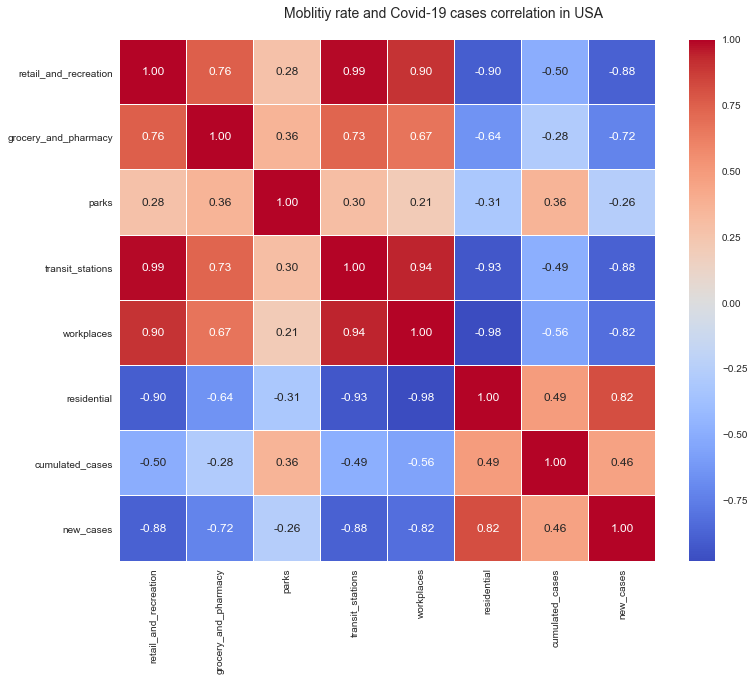

In [547]:
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(cor,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Moblitiy rate and Covid-19 cases correlation in USA', fontsize=14)

In [398]:
import matplotlib.dates as mdates
months = mdates.MonthLocator()
color = ['blue','orange','green','red','purple']

ValueError: x and y must have same first dimension, but have shapes (97,) and (492,)

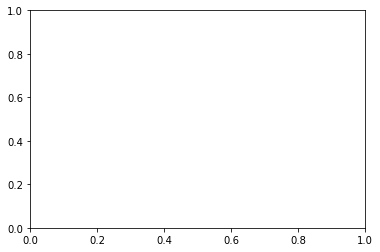

In [268]:
_ = plt.plot(range(0,97),df['retail_and_recreation'])
_ = plt.title('retail_and_recreation')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

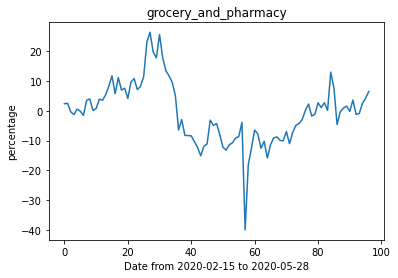

In [21]:
_ = plt.plot(range(0,97),df['grocery_and_pharmacy'])
_ = plt.title('grocery_and_pharmacy')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

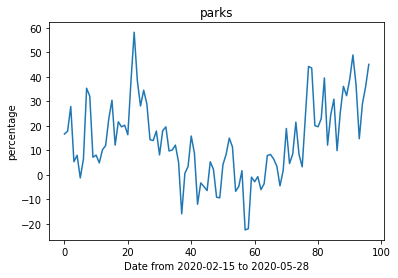

In [22]:
_ = plt.plot(range(0,97),df['parks'])
_ = plt.title('parks')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

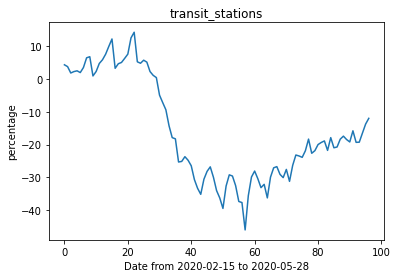

In [23]:
_ = plt.plot(range(0,97),df['transit_stations'])
_ = plt.title('transit_stations')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

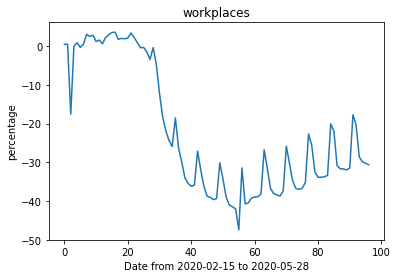

In [24]:
_ = plt.plot(range(0,97),df['workplaces'])
_ = plt.title('workplaces')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

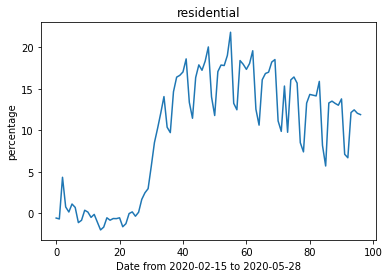

In [25]:
_ = plt.plot(range(0,97),df['residential'])
_ = plt.title('residential')
_ = plt.xlabel("Date from 2020-02-15 to 2020-05-28")
_ = plt.ylabel("percentage")

In [549]:
df.to_csv('processed_dt')